# Softmax Classification

>### [예제 13] Softmax Classification (TensorFlow)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
x_input = tf.constant([[1, 1], [2, 2.5], [2.5, 1.3], [4.3, 9.5], [5.5, 7.0], [6, 8.2], [7, 5], [8, 6], [9, 4.5]],dtype=tf.float32)
labels = tf.constant([[1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1]],dtype=tf.float32)

n_var, n_class = 2, 3
W = tf.Variable(tf.random.normal((n_var, n_class),dtype=tf.float32))
B = tf.Variable(tf.random.normal((1,n_class),dtype=tf.float32))

>### Activation Function : Softmax Function
>$S(y_{i}) = \frac{e^{y_{i}}}{\sum_{j=0}^{m-1}e^{y_{j}}}$
>## Hypothesis
>## $H(X) = S(XW+B)$

In [3]:
def logits(x):
  return tf.matmul(x, W) + B

def Hypothesis(x):
  return tf.nn.softmax(logits(x))

>## Cost Function : Cross Entropy Error
>## $cost(W,b) = -\sum_{i=1}^{m}p_{i}\log_{2}q_{i}$

In [4]:
def Cost():
  logit_value = logits(x_input)
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit_value, labels=labels))

### 학습 (Training)

In [5]:
%%time

epochs = 50000
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

# 학습 (Training)
for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>5}] cost = {:>10.4}".format(cnt, cost_graph[cnt]))
    
  optimizer.minimize(Cost, [W, B])

[    0] cost =      7.634
[ 2500] cost =     0.1121
[ 5000] cost =    0.05878
[ 7500] cost =     0.0398
[10000] cost =    0.03011
[12500] cost =    0.02424
[15000] cost =     0.0203
[17500] cost =    0.01747
[20000] cost =    0.01534
[22500] cost =    0.01367
[25000] cost =    0.01234
[27500] cost =    0.01125
[30000] cost =    0.01033
[32500] cost =   0.009557
[35000] cost =   0.008891
[37500] cost =   0.008313
[40000] cost =   0.007806
[42500] cost =   0.007359
[45000] cost =    0.00696
[47500] cost =   0.006603
[50000] cost =   0.006281
CPU times: user 3min 16s, sys: 3.8 s, total: 3min 20s
Wall time: 3min 21s


In [6]:
print(np.argmax(Hypothesis(x_input),axis=1))

x_test = tf.constant([[3.5, 1.0], [5.0, 8.0], [9.0, 7.0], [5.0, 5.0]],dtype=tf.float32)
H_x = Hypothesis(x_test)
for i in range(x_test.shape[0]):
  print("{} => Group {}: {}".format(x_test[i], np.argmax(H_x[i]), H_x[i]))

[0 0 0 1 1 1 2 2 2]
[3.5 1. ] => Group 0: [8.0467469e-01 4.1710551e-05 1.9528362e-01]
[5. 8.] => Group 1: [1.4959236e-04 9.9983084e-01 1.9499927e-05]
[9. 7.] => Group 2: [1.5408848e-04 9.2959165e-04 9.9891639e-01]
[5. 5.] => Group 1: [0.3305007  0.38074368 0.28875566]


>### Plotting

<function matplotlib.pyplot.show>

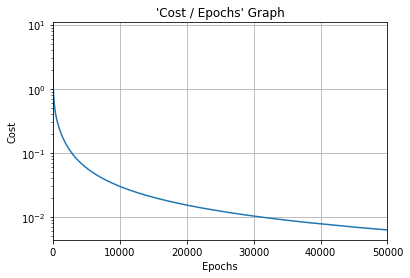

In [7]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show